# Convolutional Neural Network in Python with Tensorflow.keras

You might have already heard of image or facial recognition or self-driving cars. These are real-life implementations of Convolutional Neural Networks (CNNs). In this jupyter notebook, you will learn and understand how to implement these deep, feed-forward artificial neural networks using `Tensorflow`, and how to overcome overfitting using dropout

## Convolutional Neural Network : Introduction
Machine learning and Deep learning (branch of Computer Science) studies the design of algorithms that can learn. Deep learning is a subfield of machine learning that is inspired by artificial neural networks, which in turn are inspired by biological neural networks.

A specific kind of deep neural network is the convolutional network, which is commonly referred to as CNN or ConvNet. It's a deep, feed-forward artificial neural network. Feed-forward neural networks are also called multi-layer perceptrons (MLPs), which are the quintessential deep learning models. The models are called "feed-forward" because information flows right through the model. There are no feedback connections in which outputs of the model are fed back into itself.

Convolutional neural networks have been one of the most influential innovations in the field of computer vision. They have performed a lot better than traditional computer vision and have produced state-of-the-art results. These neural networks have proven to be successful in many different real-life case studies and applications, like:

* Image classification, object detection, segmentation, face recognition;
* Self driving cars that leverage CNN based vision systems;
* Classification of crystal structure using a convolutional neural network;
* And many more, of course!

<b>Image Classification </b>- task of taking a certain image as an input and assigning a particular category to it.

## Load the data
Keras comes with a library called `datasets`, which you can use to load datasets out of the box:

In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [38]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

<img src = "https://res.cloudinary.com/practicaldev/image/fetch/s--s6xGmaZX--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png"></img>

## Analyze the data

In [39]:
import numpy as np
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
print('Training data shape: ', train_X.shape, train_y.shape)
print('Testingdata shape: ', test_X.shape, test_y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testingdata shape:  (10000, 28, 28) (10000,)


In [41]:
# Finding the unique number of training labels
classes = np.unique(train_y)
nclasses = len(classes)

print('Total number of outputs: ', nclasses)
print('Output classes: ', classes)

Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground truth: 9')

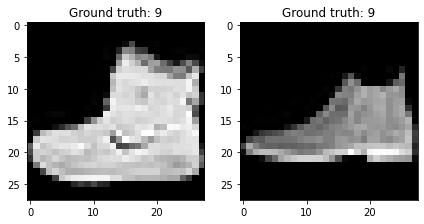

In [42]:
plt.figure(figsize=[7,7])

# Displaying the first image in the training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap = 'gray')
plt.title('Ground truth: {}'.format(train_y[0]))

# Displaying the first image in the training data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap = 'gray')
plt.title('Ground truth: {}'.format(test_y[0]))

## Data pre-processing
We need to convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [43]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive.

In [44]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.

In [45]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label: ', train_y[0])
print('New label in one-hot encoding: ', train_Y_one_hot[0])

Original label:  9
New label in one-hot encoding:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [46]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape, train_label.shape

((48000, 28, 28, 1), (48000, 10))

In [47]:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## The network
The images are of size 28 x 28. After convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network
We'll use three convolutional layers: 
* The first layer will have 32-3*3 filters
* The second layer will have 64-3*3 filters
* The third layer will have 128-3*3 filters

In addition, there are 3 max-pooling layers each of size 2*2

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1512486717/fashion-mnist-architecture_htbpsz.png"
    style="width:700px; margin: 0 40px 40px 40px;"></img>
    
## Model the data
Importing all the necessary modules required to train the model

In [12]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import activations

In [13]:
num_classes = 10

## Neural network architecture

In [14]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape = (28,28,1), padding = 'same'))
fashion_model.add(layers.Activation(activations.relu))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))

fashion_model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(layers.Activation(activations.relu))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

fashion_model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(layers.Activation(activations.relu))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(layers.Activation(activations.relu))

fashion_model.add(Dense(num_classes, activation='softmax'))

## Compile the model 

In [15]:
fashion_model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])

In [16]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [17]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size = 64, epochs = 20, verbose = 1, validation_data = (valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 8s 5ms/step - loss: 0.4852 - accuracy: 0.8225 - val_loss: 0.3433 - val_accuracy: 0.8737
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2973 - accuracy: 0.8914 - val_loss: 0.2735 - val_accuracy: 0.9005
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2482 - accuracy: 0.9093 - val_loss: 0.2686 - val_accuracy: 0.9051
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2160 - accuracy: 0.9201 - val_loss: 0.2500 - val_accuracy: 0.9112
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1920 - accuracy: 0.9297 - val_loss: 0.2293 - val_accuracy: 0.9168
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1704 - accuracy: 0.9368 - val_loss: 0.2283 - val_accuracy: 0.9210
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.1481 - accuracy: 0.9452 - val_loss: 0.2527 - val_accuracy: 0.9116
Epoch 

Finally! the model was trained on fashion-MNIST for 20 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 20 epochs the training accuracy is 99% and the training loss is quite low.

However, it looks like the model is overfitting, as the validation loss is 0.4396 and the validation accuracy is 92%. Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

## Model evaluation on the Test set

In [18]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.4634 - accuracy: 0.9130


In [19]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  0.46341192722320557
Test accuracy:  0.9129999876022339


Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

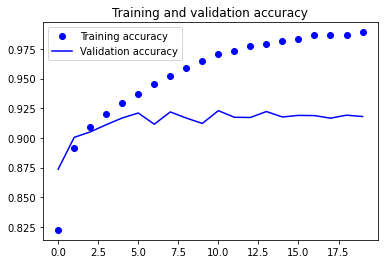

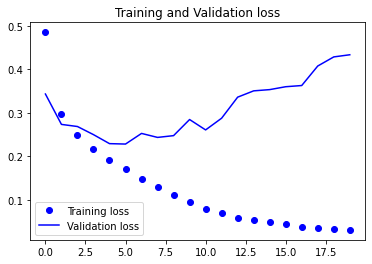

In [20]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']

loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

## Adding dropout into the network

You can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount.

In [21]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape = (28,28,1), padding = 'same'))
fashion_model.add(layers.Activation(activations.relu))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(layers.Activation(activations.relu))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(layers.Activation(activations.relu))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(layers.Activation(activations.relu))
fashion_model.add(Dropout(0.3))

fashion_model.add(Dense(num_classes, activation='softmax'))

In [22]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [23]:
fashion_model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])

In [24]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size = 64, epochs = 20, verbose = 1, validation_data=(valid_X, valid_label), )

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.6469 - accuracy: 0.7587 - val_loss: 0.3863 - val_accuracy: 0.8588
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 0.4072 - accuracy: 0.8513 - val_loss: 0.3445 - val_accuracy: 0.8700
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 0.3513 - accuracy: 0.8715 - val_loss: 0.2920 - val_accuracy: 0.8926
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3244 - accuracy: 0.8814 - val_loss: 0.2752 - val_accuracy: 0.8987
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3007 - accuracy: 0.8894 - val_loss: 0.2750 - val_accuracy: 0.8985
Epoch 6/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2865 - accuracy: 0.8935 - val_loss: 0.2485 - val_accuracy: 0.9080
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2724 - accuracy: 0.8995 - val_loss: 0.2412 - val_accuracy: 0.9101
Epoch 

In [25]:
fashion_model.save('fashion_model_dropout.h5py')

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


## Model evaluation on the Test set

In [26]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.2158 - accuracy: 0.9186


In [28]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  0.21580035984516144
Test accuracy:  0.9186000227928162


Adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.

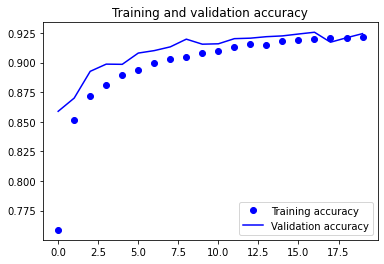

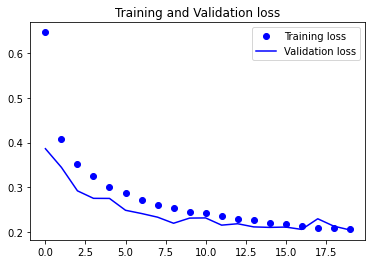

In [29]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']

loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

Therefore, you can say that your model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

## Predict labels

In [30]:
predicted_classes = fashion_model.predict(test_X)

Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use `np.argmax()` to select the index number which has a higher value in a row.

In [31]:
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)
predicted_classes.shape, test_y.shape

((10000,), (10000,))

Found 9141 correct labels


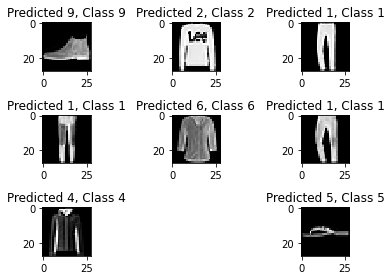

In [32]:
correct = np.where(predicted_classes == test_y)[0]
print('Found %d correct labels'% len(correct))

for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_y[correct]))
    plt.tight_layout()

Found 859 incorrect labels


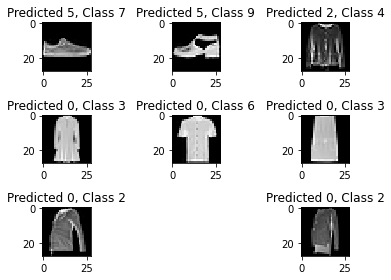

In [33]:
incorrect = np.where(predicted_classes != test_y)[0]
print('Found %d incorrect labels'% len(incorrect))

for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_y[incorrect]))
    plt.tight_layout()

## Classification report

In [34]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.75      0.92      0.82      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.85      0.91      0.88      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.88      0.84      0.86      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.86      0.66      0.74      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



We can see that the classifier is underperforming for class 6 regarding both precision and recall. For class 0 and class 2, the classifier is lacking precision. Also, for class 4, the classifier is slightly lacking both precision and recall.